In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset (replace the path with the correct path)
df = pd.read_csv(r"C:\Users\brian\OneDrive\Escritorio\Lambton\Semester2\ProjectTraffic\US&CanadaRTTAData.csv")  # Replace with your actual file path

In [43]:
# Display the first few rows of the dataset
print(df.head())

        city       lon      lat  weather_id weather_main  \
0    Toronto  -79.4163  43.7001         800        Clear   
1  Vancouver -123.1193  49.2497         520         Rain   
2   Montreal  -73.5878  45.5088         804       Clouds   
3    Calgary -114.0853  51.0501         804       Clouds   
4   Edmonton -113.4687  53.5501         601         Snow   

           weather_description   temp  feels_like  temp_min  temp_max  \
0                    clear sky   5.67        0.41      5.05      6.40   
1  light intensity shower rain   6.73        4.50      5.76      7.58   
2              overcast clouds   5.60        1.80      5.08      6.12   
3              overcast clouds -10.67      -17.67    -11.34    -10.03   
4                         snow -11.74      -17.76    -12.31    -11.22   

   pressure  humidity  visibility  wind_speed  wind_deg  rain_1h  clouds_all  \
0      1009        76     10000.0       10.28       300     0.00           0   
1      1007        88     10000.0       

In [45]:
# Checking for missing values
print("Missing values in the dataset:\n", df.isnull().sum())

Missing values in the dataset:
 city                     0
lon                      0
lat                      0
weather_id               0
weather_main             0
weather_description      0
temp                     0
feels_like             271
temp_min                 0
temp_max                 0
pressure                 0
humidity                 0
visibility               6
wind_speed               0
wind_deg                 0
rain_1h                  0
clouds_all               0
sunrise                  0
sunset                   0
dtype: int64


In [47]:
# Drop rows with missing values (if necessary)
df = df.dropna()

# Checking data types and structure
print("Data Types:\n", df.dtypes)

Data Types:
 city                    object
lon                    float64
lat                    float64
weather_id               int64
weather_main            object
weather_description     object
temp                   float64
feels_like             float64
temp_min               float64
temp_max               float64
pressure                 int64
humidity                 int64
visibility             float64
wind_speed             float64
wind_deg                 int64
rain_1h                float64
clouds_all               int64
sunrise                  int64
sunset                   int64
dtype: object


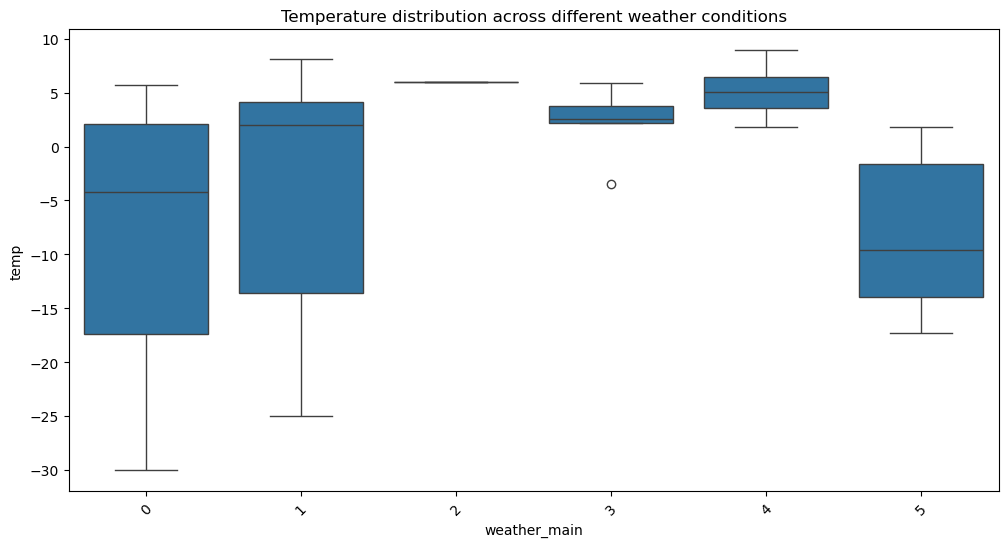

In [49]:
# Encode categorical columns like 'weather_main' and 'weather_description' if necessary
categorical_cols = ['city', 'weather_main', 'weather_description']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Convert sunrise and sunset times from Unix timestamp (if applicable)
df['sunrise'] = pd.to_datetime(df['sunrise'], unit='s')
df['sunset'] = pd.to_datetime(df['sunset'], unit='s')

# Create new features or modify existing ones as needed
df['temp_diff'] = df['temp_max'] - df['temp_min']  # Difference between max and min temperature
df['temp_feel_diff'] = df['temp'] - df['feels_like']  # Difference between actual and feels-like temperature

# Create a boxplot to visualize the distribution of temperature across different weather conditions
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather_main', y='temp', data=df)
plt.title('Temperature distribution across different weather conditions')
plt.xticks(rotation=45)
plt.show()

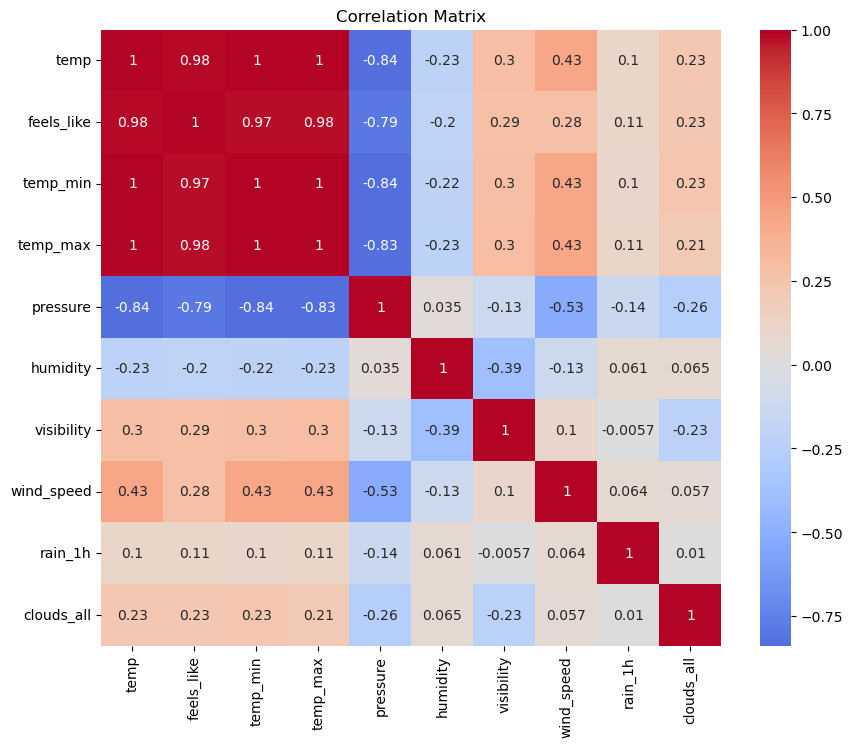

In [51]:
# Correlation matrix for numerical variables
correlation_matrix = df[['temp', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity', 'visibility', 
                         'wind_speed', 'rain_1h', 'clouds_all']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

In [53]:
###NEW CODE

# Prepare data for modeling: We are assuming 'weather_id' is the target variable (if you want to predict it)
X = df[['temp', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity', 'visibility', 
        'wind_speed', 'wind_deg', 'rain_1h', 'clouds_all']]

# If 'weather_id' is categorical, we need to encode it
y = df['weather_id']

# Drop some key features to introduce underfitting and reduce accuracy
X = X.drop(columns=['visibility', 'humidity'])  # Removing some important features

# Add noise to the features to degrade the model performance
noise = np.random.normal(0, 1, size=X.shape)
X_noisy = X + noise  # Adding random noise to the dataset

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=42)

# Random Forest model with underfitting: Using fewer trees and shallow depth
model = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42)  # Reduced model capacity
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5903614457831325

Classification Report:
               precision    recall  f1-score   support

         500       0.00      0.00      0.00         3
         501       0.00      0.00      0.00         1
         502       0.00      0.00      0.00         1
         600       0.00      0.00      0.00         6
         701       0.00      0.00      0.00         2
         800       0.00      0.00      0.00         5
         801       0.00      0.00      0.00         1
         802       0.75      0.50      0.60         6
         803       0.46      0.55      0.50        11
         804       0.62      0.85      0.72        47

    accuracy                           0.59        83
   macro avg       0.18      0.19      0.18        83
weighted avg       0.47      0.59      0.52        83



C:\Users\brian\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\brian\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\brian\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [55]:
# Feature Importance from Random Forest model
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print("Feature Importances:\n", feature_importances.sort_values(by='Importance', ascending=False))

Feature Importances:
       Feature  Importance
8  clouds_all    0.362592
1  feels_like    0.207466
4    pressure    0.131112
2    temp_min    0.093636
0        temp    0.064255
5  wind_speed    0.051562
6    wind_deg    0.045383
3    temp_max    0.025483
7     rain_1h    0.018511


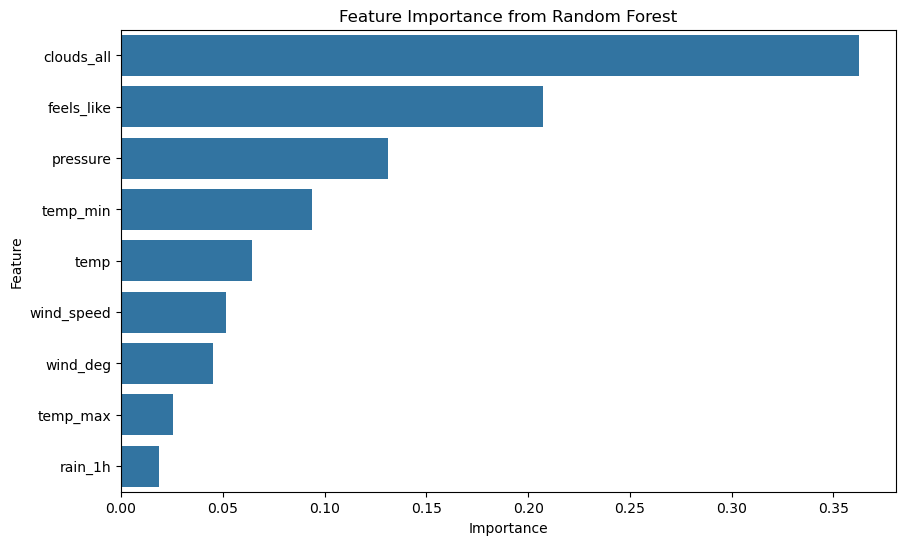

In [57]:
# Visualizing the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.sort_values(by='Importance', ascending=False))
plt.title('Feature Importance from Random Forest')
plt.show()